In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings(action = 'ignore')
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Telco Customer Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.duplicated().sum()

0

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.drop(columns='customerID', inplace=True)

In [12]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [14]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
obj_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)
obj_cols.remove('Churn')

In [18]:
print(obj_cols)
print(num_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


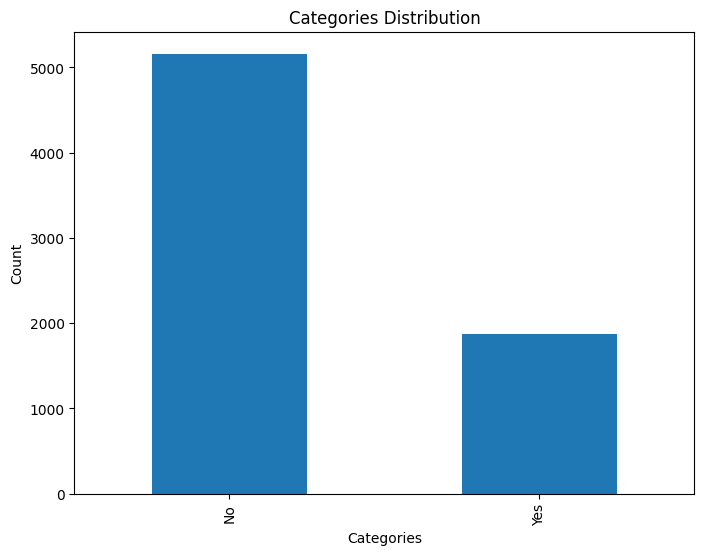

Imbalance Ratio: 0.36


In [19]:
Churn_counts = df['Churn'].value_counts()

imbalance_ratio = Churn_counts.min() / Churn_counts.max()

plt.figure(figsize=(8, 6))
Churn_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Categories Distribution')
plt.show()

print("Imbalance Ratio: {:.2f}".format(imbalance_ratio))

In [20]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)
    
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2, top_categories: int = 5):
    top_categories_data = data[column].value_counts().nlargest(top_categories)
    plt.figure(figsize=(height, height/aspect))
    sns.countplot(data=data[data[column].isin(top_categories_data.index)], x=column, order=top_categories_data.index)
    plt.title(f'Top Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
def continuous_vs_target(df, continuous_variable, target_variable):
    plt.figure(figsize=(10, 6))
    sns.pointplot(x=continuous_variable, y=target_variable, data=df, ci=None)
    plt.xlabel(continuous_variable)
    plt.ylabel(target_variable)
    plt.title(f"Point Plot: {continuous_variable} vs {target_variable}")
    plt.show()
    
def categorical_vs_target(df, categorical_variable, target_variable):
    cross_tab = pd.crosstab(df[categorical_variable], df[target_variable])
    
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.xlabel(categorical_variable)
    plt.ylabel('Count')
    plt.title(f'{categorical_variable} vs {target_variable}')
    
    plt.show()

In [21]:
for col in obj_cols:
    get_unique_values(df, col)

Column: gender has 2 unique values

Male      3549
Female    3483
Name: gender, dtype: int64
Column: Partner has 2 unique values

No     3639
Yes    3393
Name: Partner, dtype: int64
Column: Dependents has 2 unique values

No     4933
Yes    2099
Name: Dependents, dtype: int64
Column: PhoneService has 2 unique values

Yes    6352
No      680
Name: PhoneService, dtype: int64
Column: MultipleLines has 3 unique values

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Column: InternetService has 3 unique values

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
Column: OnlineSecurity has 3 unique values

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
Column: OnlineBackup has 3 unique values

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
Column: D

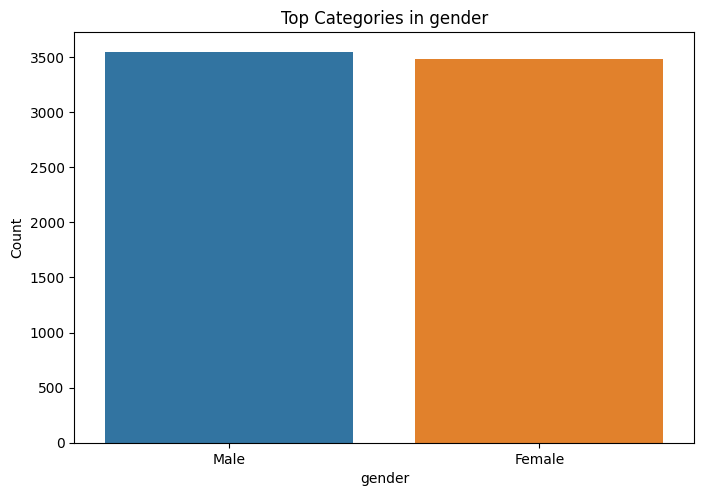

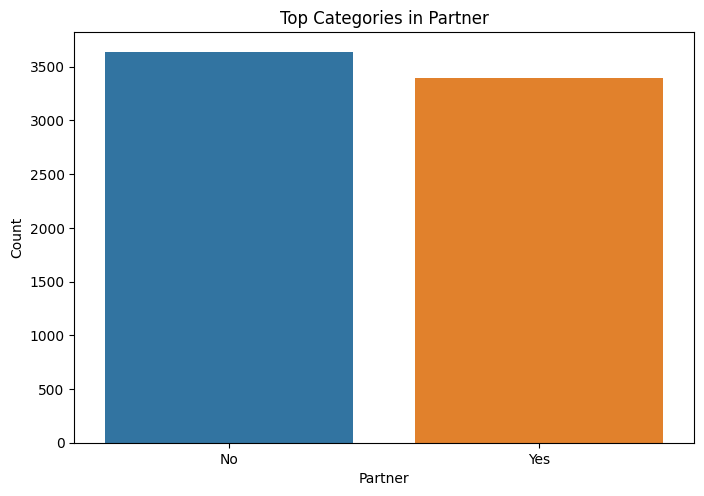

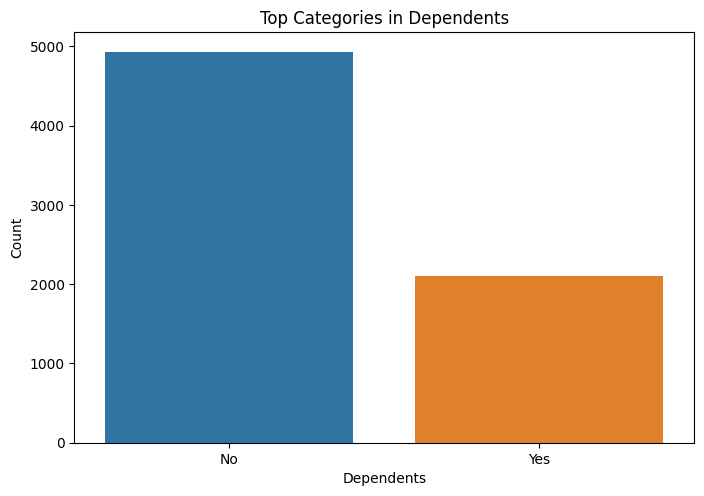

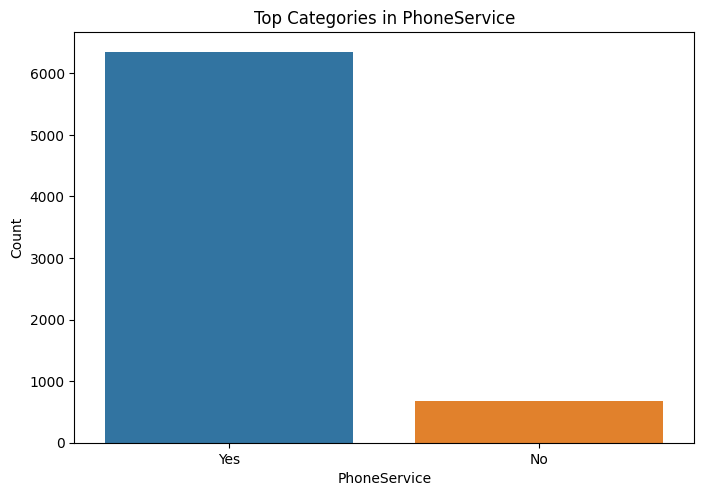

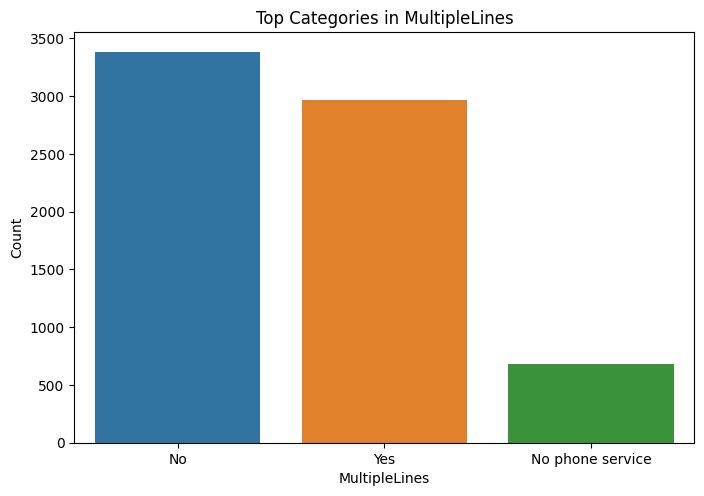

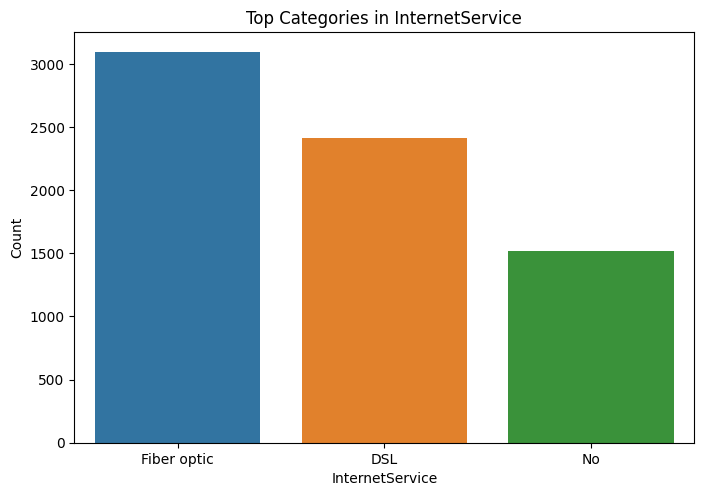

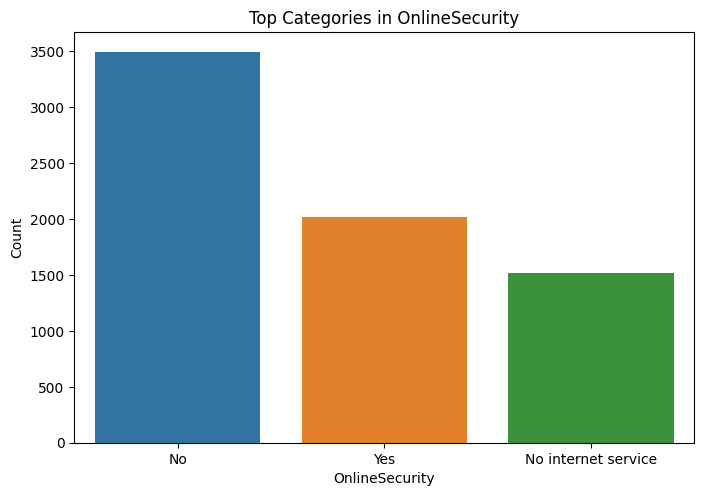

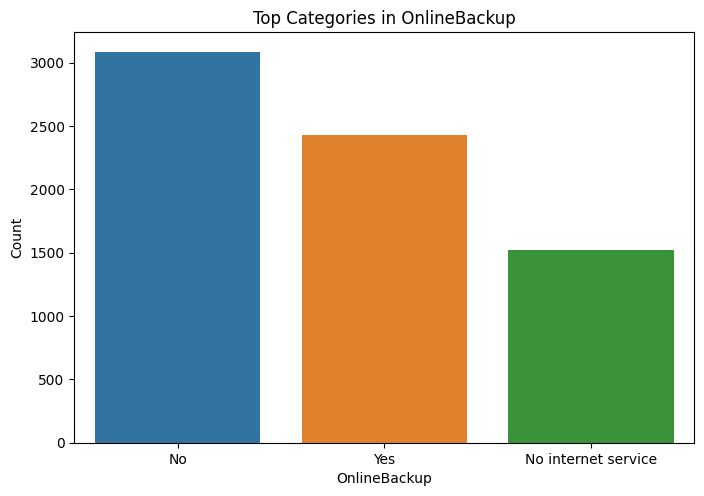

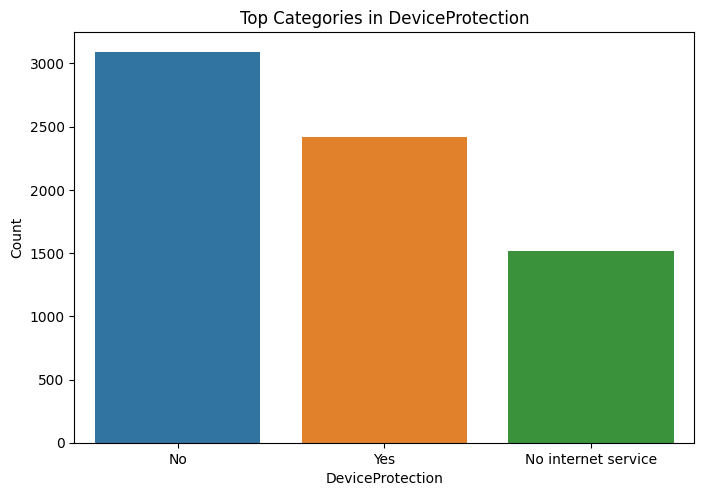

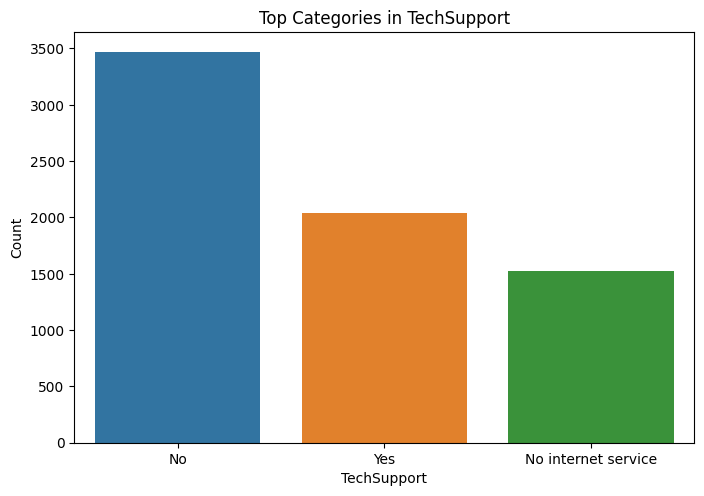

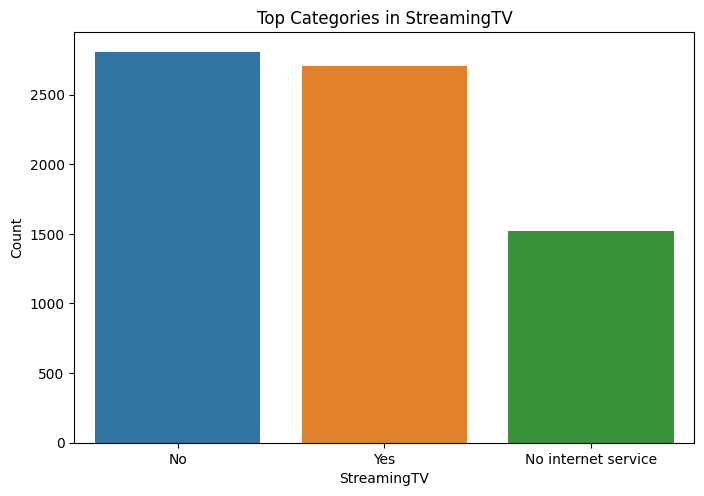

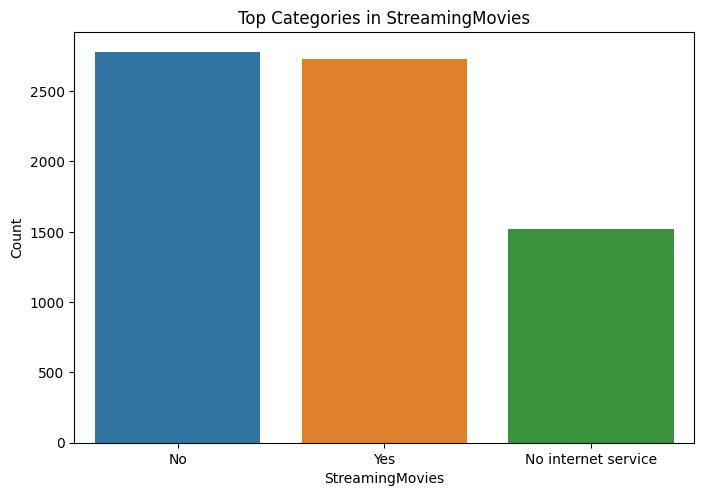

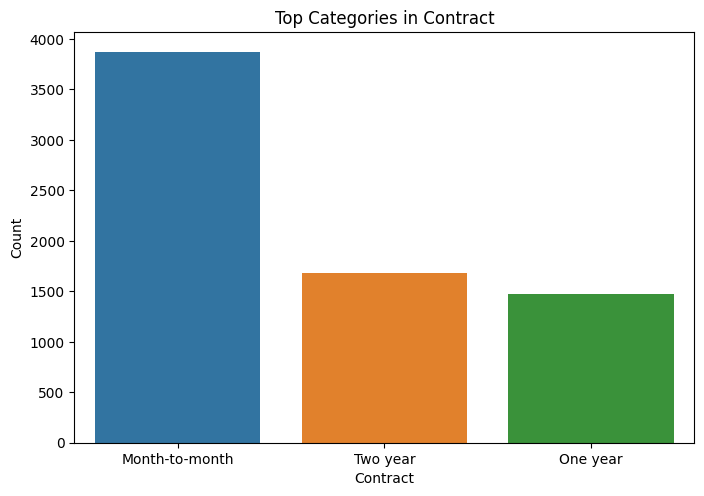

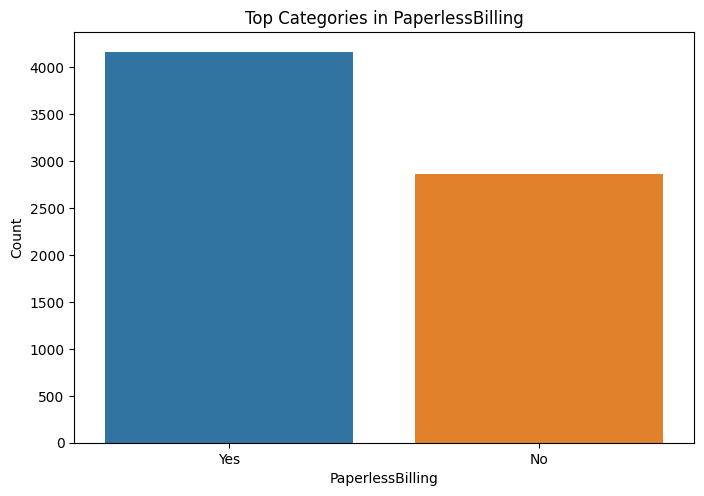

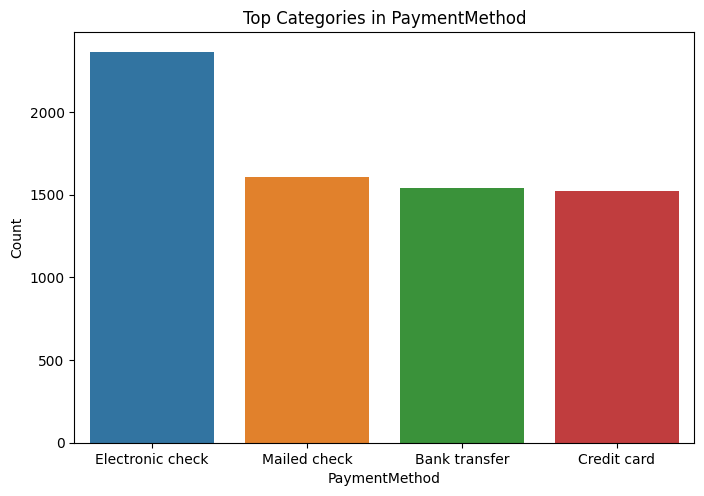

In [22]:
for col in obj_cols:
    plot_categorical_distribution(df, col, height = 8, aspect = 1.5)

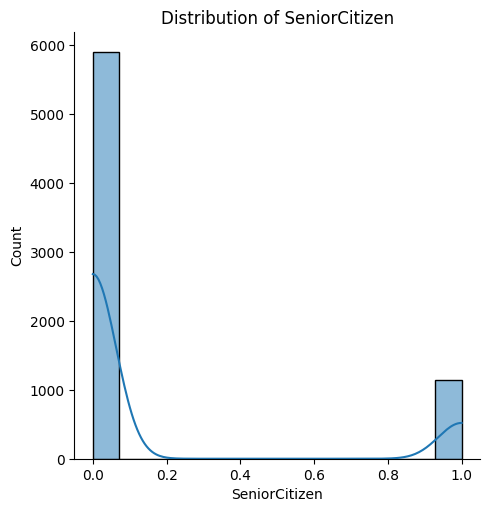

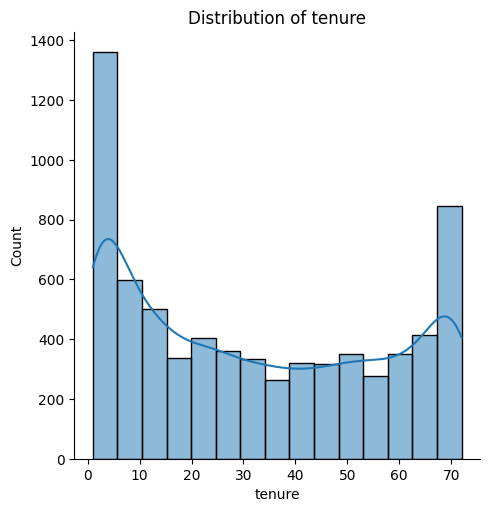

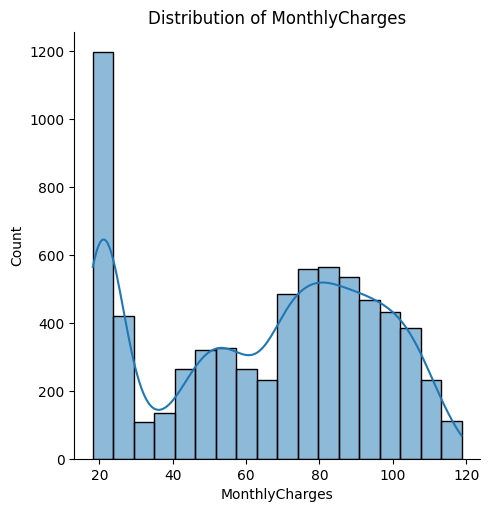

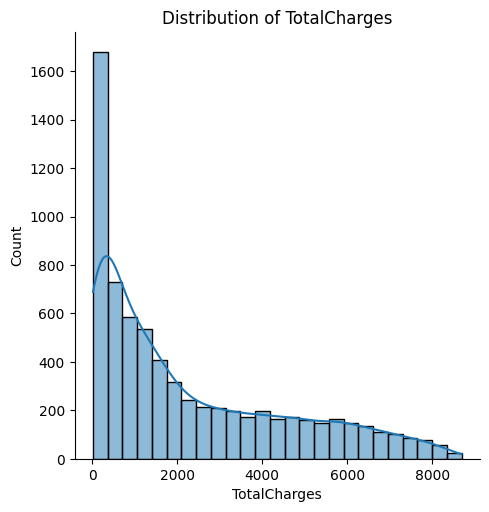

In [23]:
for col in num_cols:
    plot_continuous_distribution(df, col, height = 5)

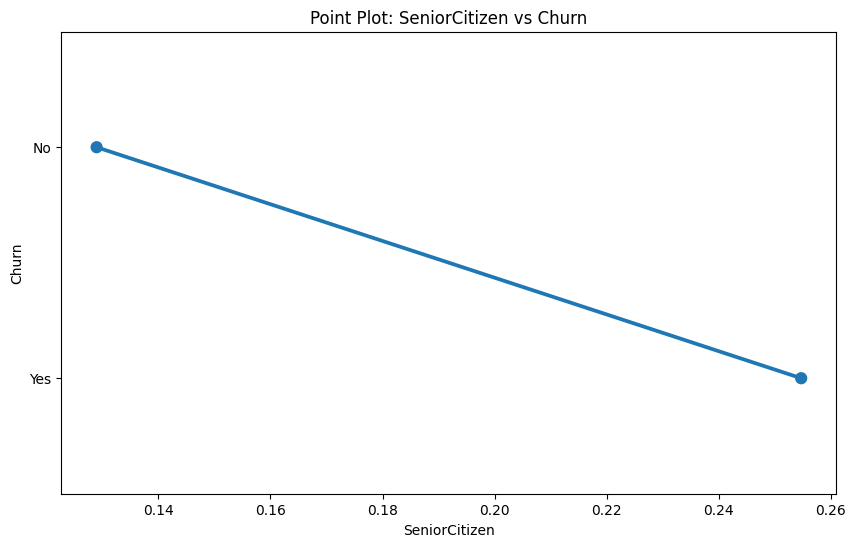

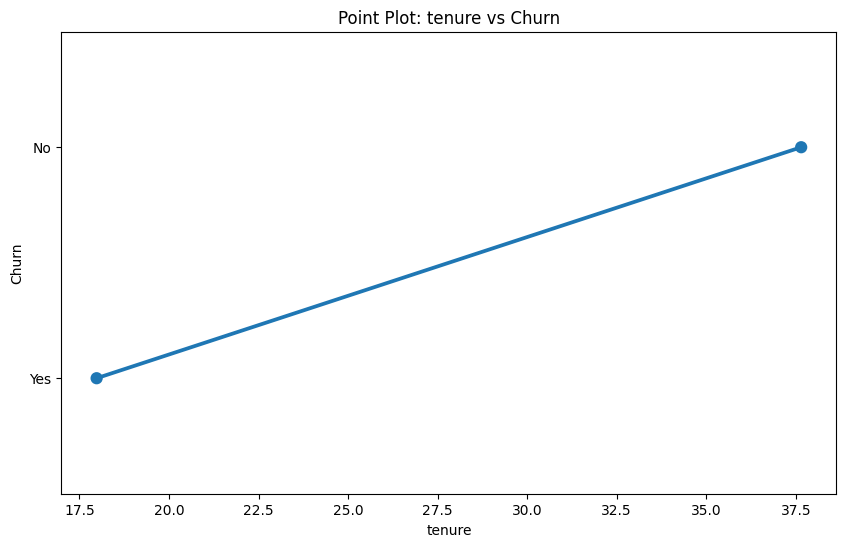

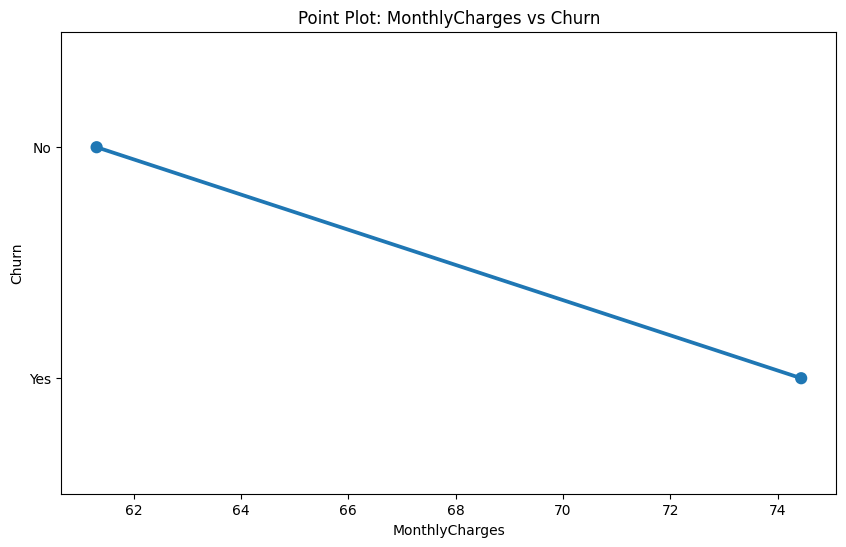

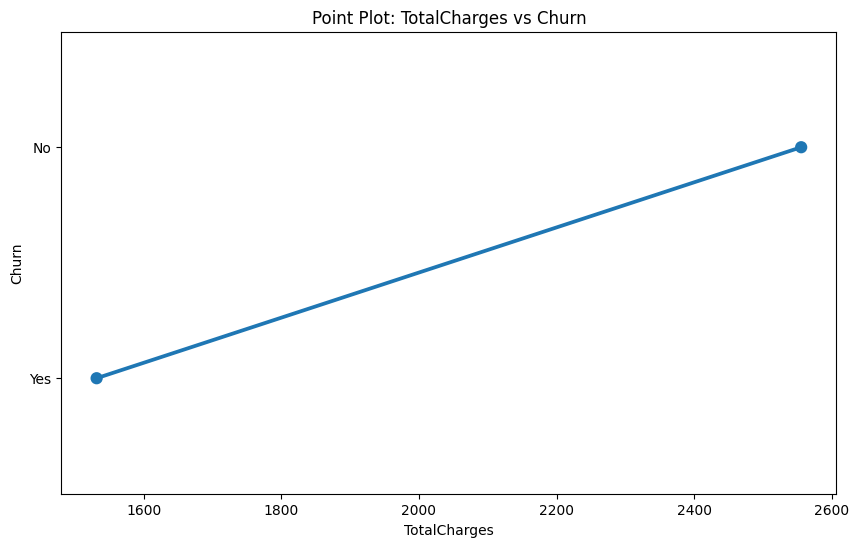

In [24]:
for col in num_cols:
    continuous_vs_target(df, col, 'Churn')

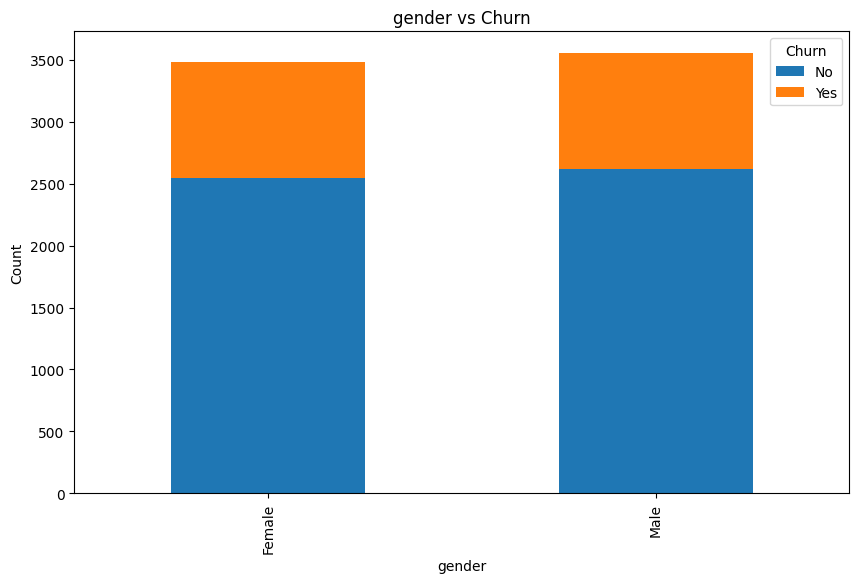

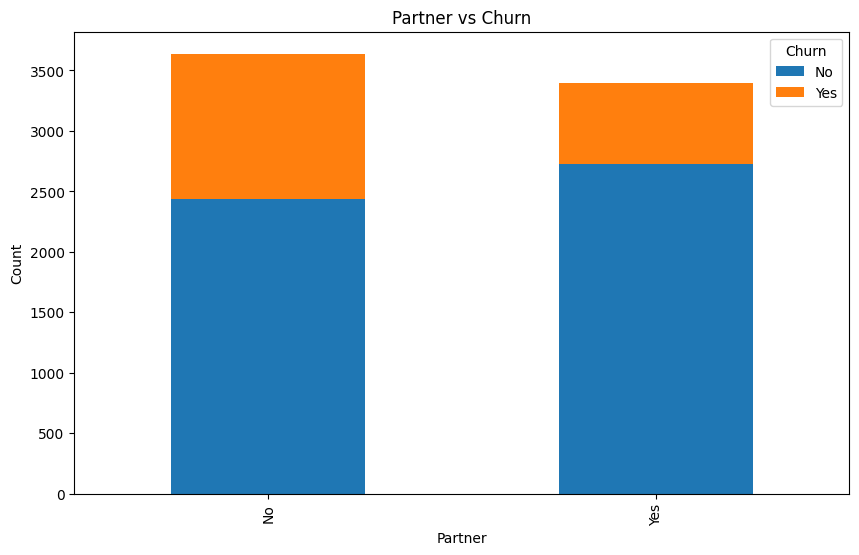

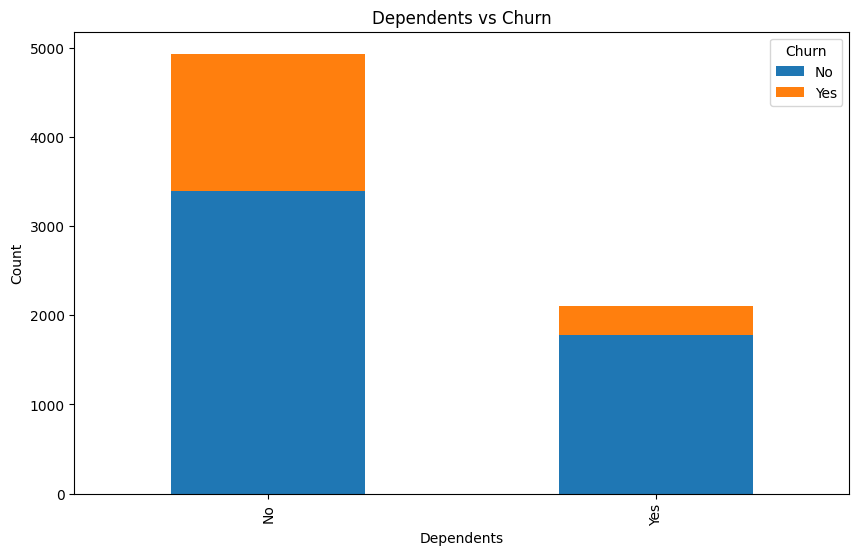

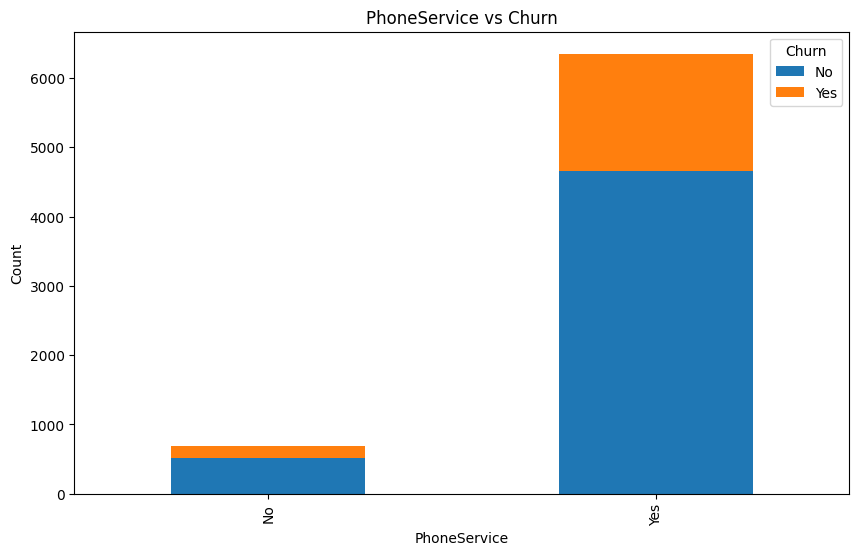

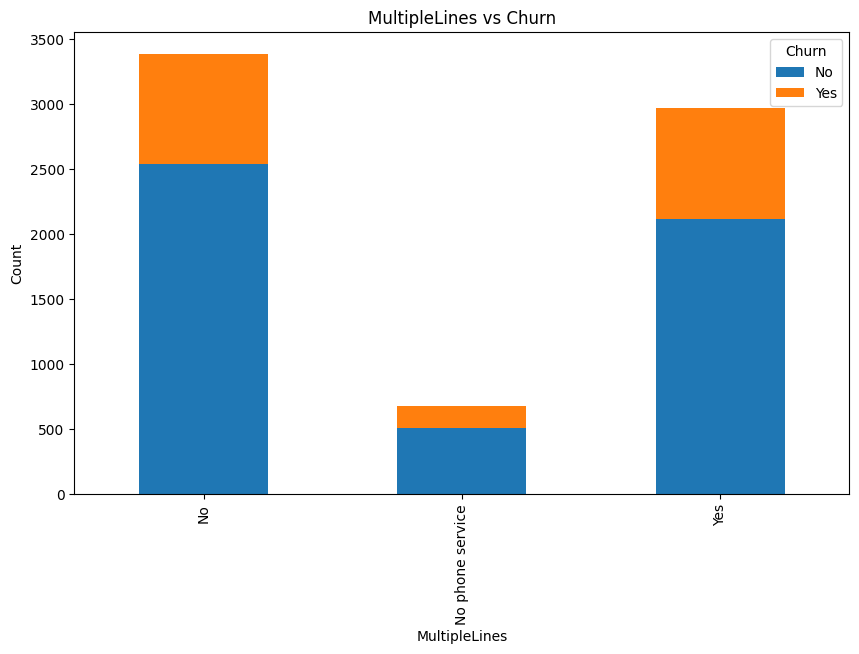

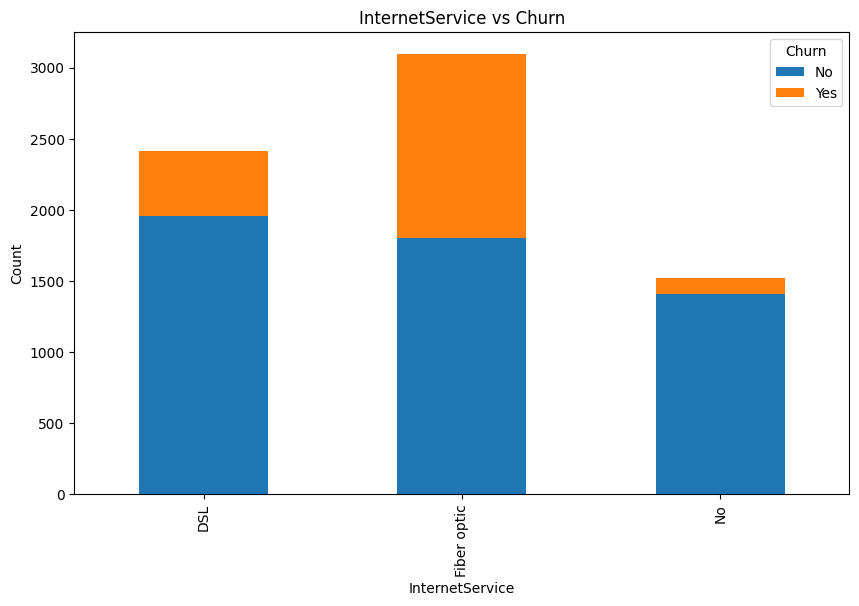

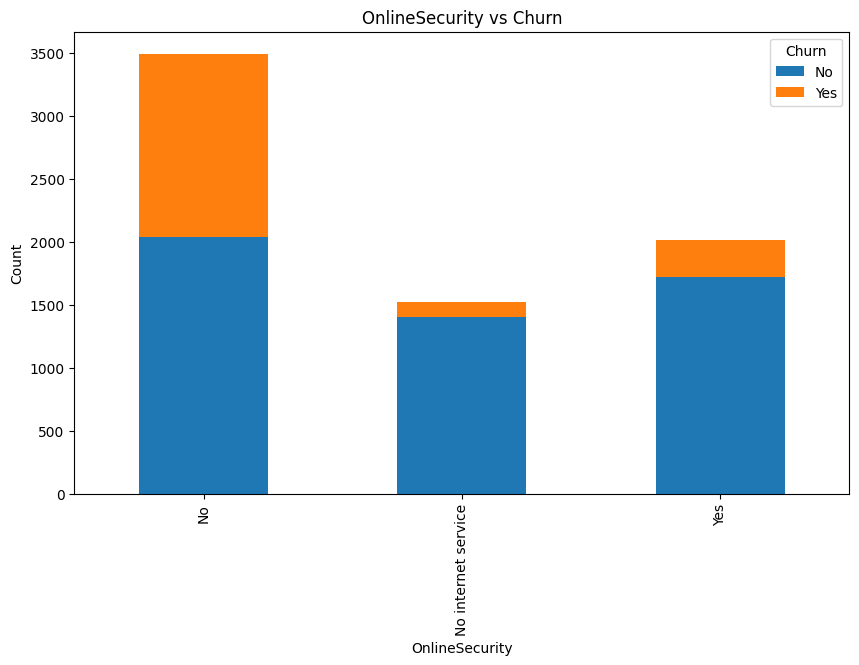

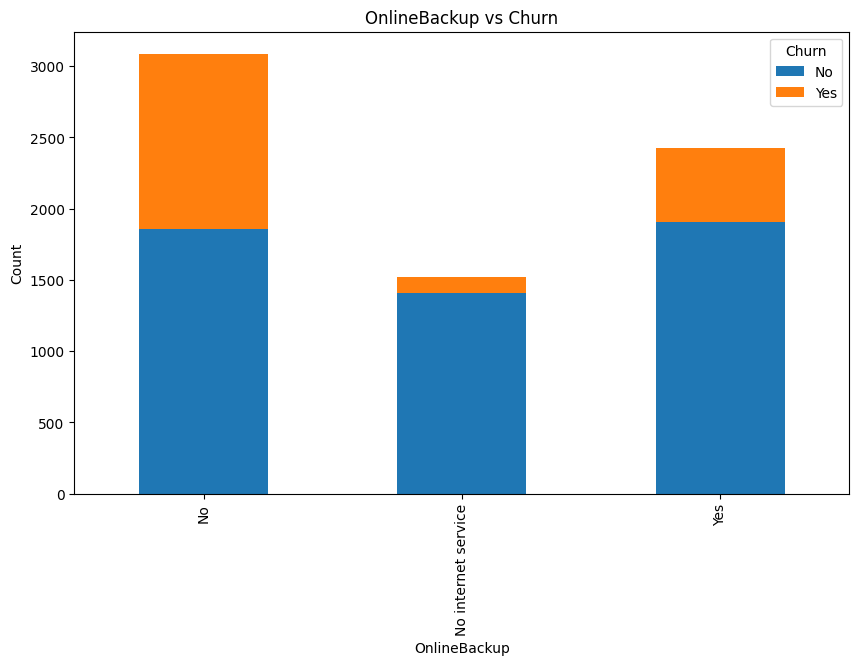

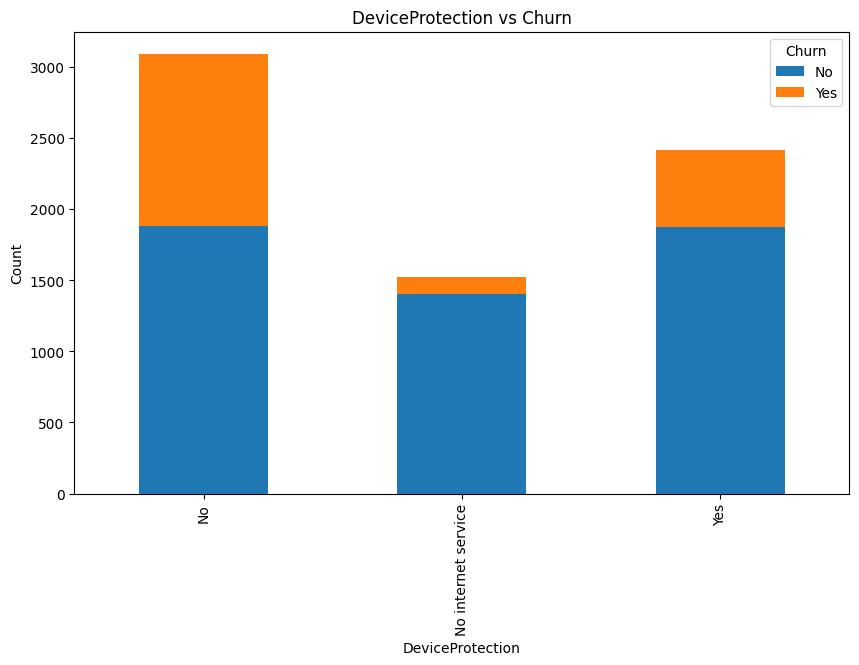

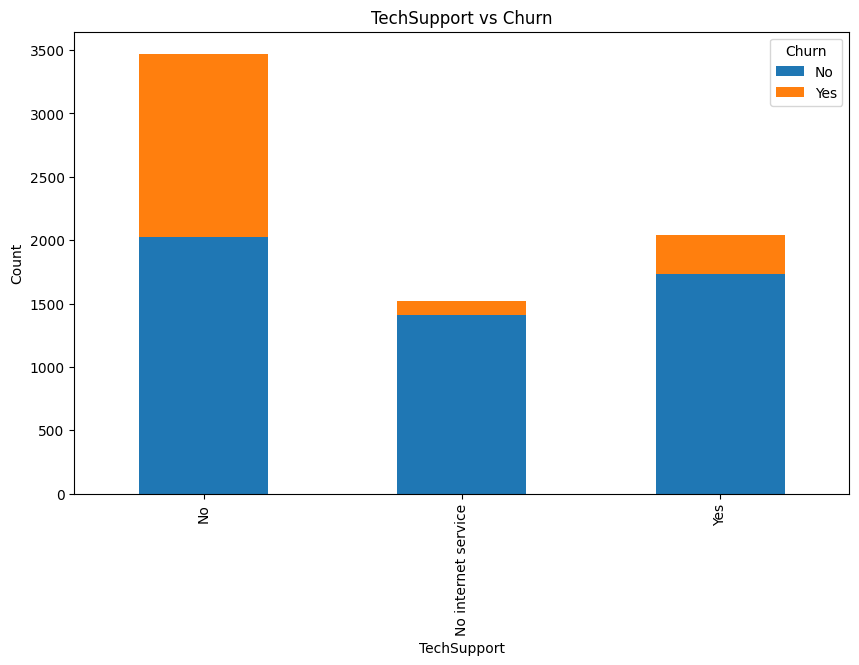

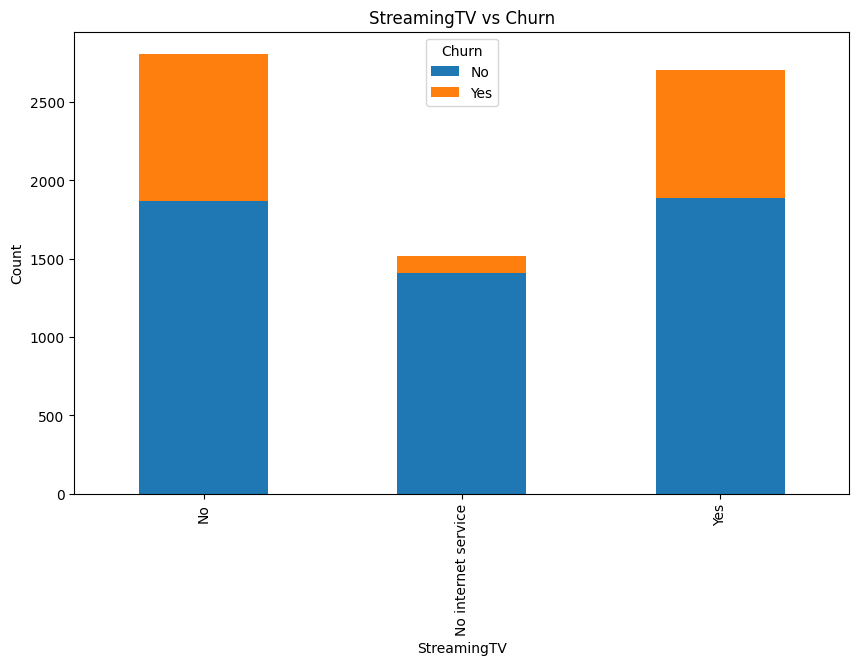

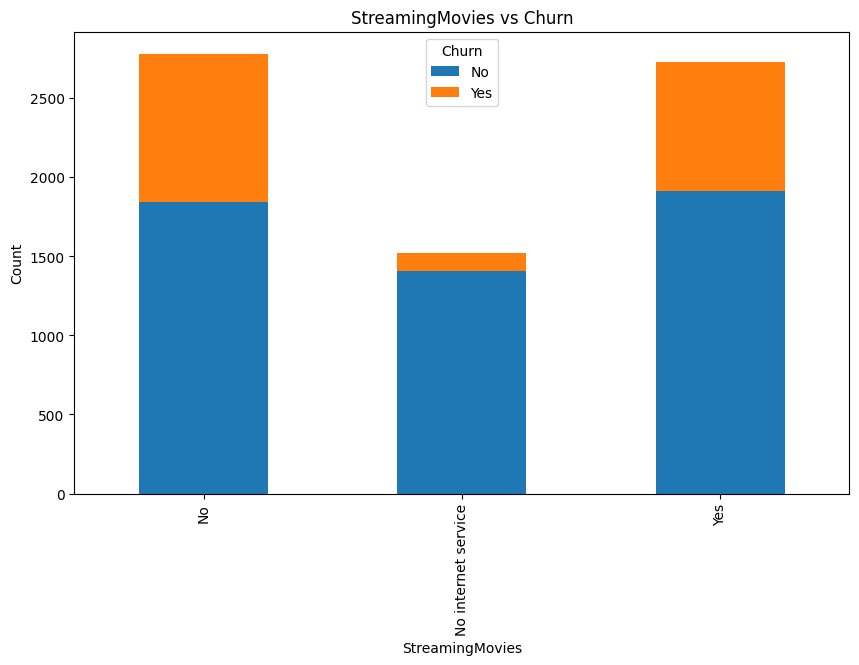

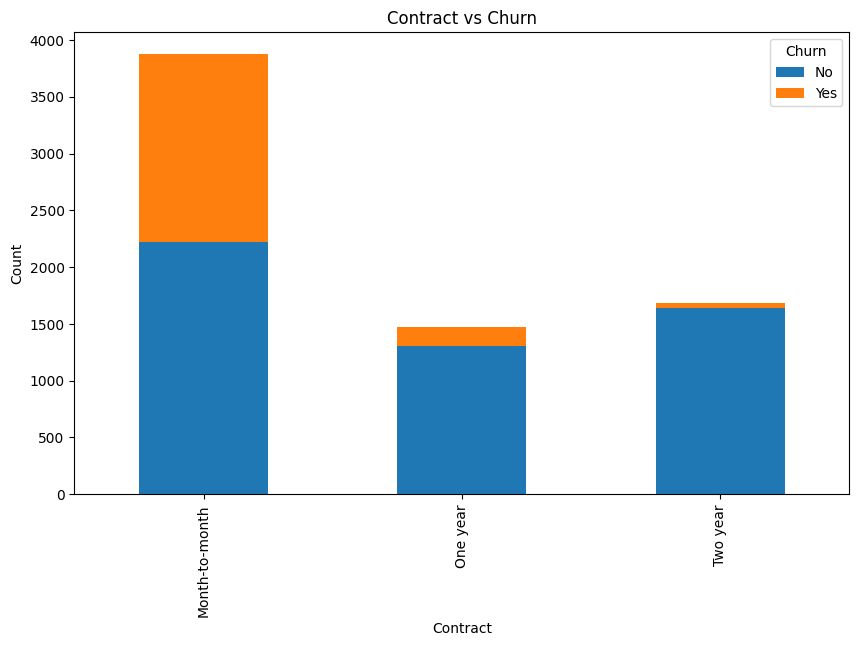

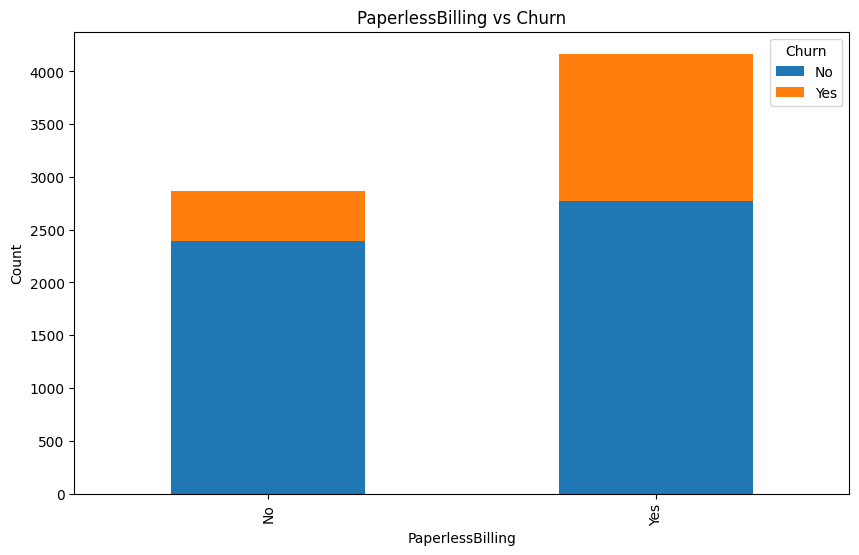

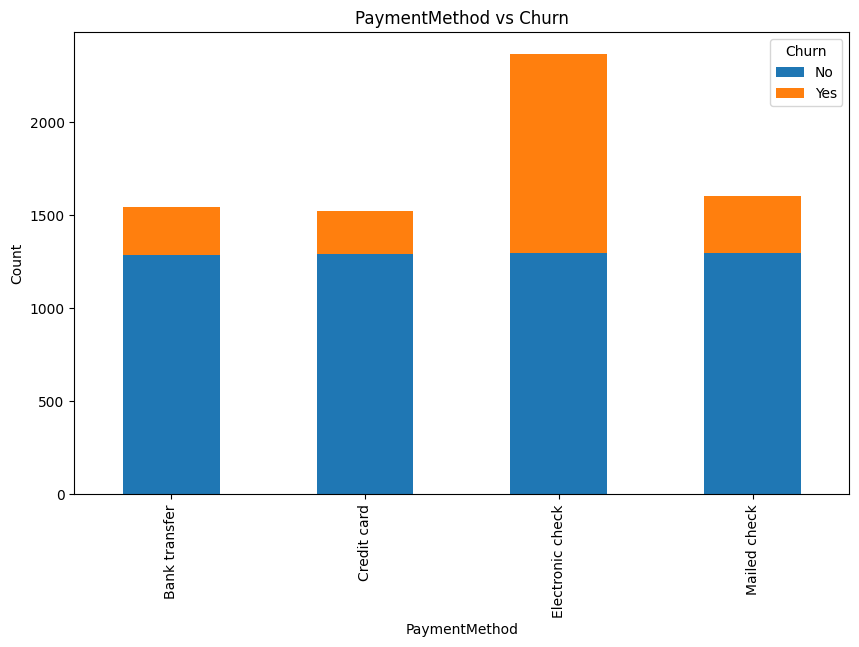

In [25]:
for col in obj_cols:
    categorical_vs_target(df, col, 'Churn')

## Insights from data
1. Longer tenure (up to 72 months) leads to negative churn, indicating higher customer retention.
2. Lower monthly charges result in negative churn, suggesting customers with low bills are less likely to leave.
3. Higher total charges (up to 8685) correlate with positive churn, indicating customers with significant overall spending are more likely to churn.
4. Customers with partners experience lower churn, while those without dependents do not experience churn.
5. Having phone service increases churn likelihood, while multiple lines and DSL internet service also contribute to higher churn probability.
6. Customers with online security and online backup experience reduced churn, indicating these services enhance customer retention.
7. Clients with protected devices are less likely to churn, and those with paperless billing show decreased churn probability.
8. Customers with contracts longer than 2 years have lower churn, indicating that longer commitments foster customer loyalty.

In [26]:
df.to_csv("Cleaned_data.csv", index=False)